#Superstore EDA Final

Zachary Lewis

## About This Data Set:

This is a series of analysis of the Superstore data from 2012 to 2015 provided as part of the course curriculum. The goal of my analysis is to review overall performance in profit, the top products and over time growth.

## Import Libraries and Set Notebook Defaults:

In [1]:
# @title
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
%matplotlib inline

# Set Pandas to display numbers with comma
# Separators without scientific notation and two decimal
pd.options.display.float_format = '{:,.2f}'.format

# Fully display all columns in dataframes
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Pull dataset from Google Drive and assign it to path
path = '/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

# Read Excel data into df1 and df2, specify the data type for Postal Code as object and Quantity to int in df1
df1 = pd.read_excel(path, 'Orders', dtype={'Postal Code': object})
df2 = pd.read_excel(path, 'People')

# Adjust df1's values with missing characters and replace '00nan' with 'na'
df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5).replace('00nan', 'na')

# Calculate and creates columns Total Spent, Retail Price, and Discounted Price
df1['Total Spent'] = df1['Sales'] + df1['Shipping Cost']
df1['Retail Price'] = (df1.Sales / df1.Quantity) / (1-(df1.Discount))
df1['Discounted Price'] = df1['Retail Price'] - (df1['Retail Price'] * df1.Discount)

# Reorganize columns for easier analysis
df1 = df1[['Row ID','Order ID','Order Date',
'Ship Date','Ship Mode','Customer ID','Customer Name',
'Segment','Postal Code','City','State','Country','Region',
'Market','Product ID','Category','Sub-Category','Product Name',
'Retail Price','Discount','Discounted Price','Quantity',
'Sales','Shipping Cost','Total Spent','Order Priority',
'Profit']]

# Add column Row ID to df2 with values ranged from 51291 to 51315
df2['Row ID'] = range(51291, 51315)

# Rename Person to Customer Name in df2
df2.rename(columns={'Person':'Customer Name'}, inplace=True)

# Concatenate df1 and df2 into one dataframe, replaces/remove null values, and creates new index
# NOTE: DATETIME VALUES FOR DATA FROM DF2 IS LISTED AS '1998-01-01', OBJECT ARE LISTED AS 'na', AND INT/FLOAT VALUES ARE LISTED AS 0
df = pd.concat([df1, df2]).fillna({'Order ID' : 'na', 'Ship Mode' : 'na', 'Customer ID' : 'na',
'Segment' : 'na', 'Postal Code' : 'na', 'City' : 'na', 'State' : 'na', 'Country' : 'na', 'Market' : 'na', 'Product ID' : 'na',
'Category' : 'na', 'Sub-Category' : 'na', 'Product Name' : 'na', 'Order Priority' : 'na', 'Order Date' : pd.to_datetime('1998-01-01'),
'Ship Date': pd.to_datetime('1998-01-01'), 'Sales' : 0, 'Quantity' : 0, 'Discount' : 0, 'Profit' : 0, 'Order Priority' : 0,
'Shipping Cost' : 0, 'Total Spent' : 0, 'Discounted Price' : 0, 'Retail Price' : 0, }).reset_index()

# Capitalize the index column
df.rename(columns={'index':'Index'}, inplace=True)

# Change the data type of the column Quantity from float to int
df.Quantity = df.Quantity.astype(int)

Mounted at /content/drive


## Summary of Dataset and Data Dictionary:

Data originated from  Excel document: `Global_Superstore_Orders_2012_2015.xlsx` with two worksheet tabs 'Orders' and 'People'

From the 'Orders' tab, assigned to `df1`, are the following columns:

* Index - Internal identifier of the dataset
* Row ID - Unique identifier for rows
* Order ID  - Unique identifier for orders                
* Ship Date - Date order was shipped       
* Ship Mode - Shipping method - First Class, Second Class, Standard Class, Same Day               
* Customer ID  - Unique identifier for customers            
* Customer Name - Customer's full name            
* Segment - Account/order typ - Consumer, Corporate, Home Office                 
* Postal Code - Postal code (US addresses only)               
* City - Customer's city                  
* State - Customer's state                  
* Country - Customer's country                  
* Region  - Customer's region                 
* Market  - Customer's market                 
* Product ID - Unique identifier for the product        
* Category  - Category of the product (Technology, Office Supplies, Furniture)            
* Sub-Category - Sub-category of the product             
* Product Name - Product's name                  
* Discount - Discount applied to the product              
* Quantity - Quantity of the product in the order               
* Sales - Cost of the order            
* Shipping Cost - Shipping cost of the order          
* Order Priority - order was considered 'Critical', 'High', 'Medium', or 'Low priority for shipping          
* Profit - Profit gained from the order

Additionally, the following columns were created using calcuations within `df1` for raw data review and analysis if necessary:

* Retail Price
* Discounted Price
* Total Spent   

 `Retail Price` is the price of the product before any discounts were applied; `Discounted Price` is the price of an item after discounts; and `Total Spent` is the sale of an item with shipping cost added *(assumption being customers are charged for shipping)*.

From following columns are found in the 'People' tab assigned to `df2`:

* Person
* Region

 The column name of `d2's Person` was renamed to `Customer Name` and was concatenated with `df1` into `df`, the dataframe used for this analysis is 51,314 rows within 27 columns after null values are accounted for.

### Sample of the Data:

In [8]:
# @title
df.sample(5)

,Index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Retail Price,Discount,Discounted Price,Quantity,Sales,Shipping Cost,Total Spent,Order Priority,Profit
5933,5933,4855,MX-2012-KE1642018-41187,2012-10-05,2012-10-07,Second Class,KE-1642018,Katrina Edelman,Corporate,na,Curitiba,Parana,Brazil,South America,LATAM,FUR-CH-5380,Furniture,Chairs,"Novimex Executive Leather Armchair, Red",306.80,0.00,306.80,7,"2,147.60",190.08,"2,337.68",Medium,923.44
26993,26993,50363,ML-2014-ND846079-41866,2014-08-15,2014-08-20,Standard Class,ND-846079,Neil Ducich,Corporate,na,Bamako,Bamako,Mali,Western Africa,Africa,OFF-FA-5472,Office Supplies,Fasteners,"OIC Push Pins, Assorted Sizes",12.36,0.00,12.36,2,24.72,1.91,26.63,Medium,4.92
47562,47562,4764,US-2015-TZ2158036-42318,2015-11-10,2015-11-14,Second Class,TZ-2158036,Tracy Zic,Consumer,na,Santiago de los Caballeros,Santiago,Dominican Republic,Caribbean,LATAM,OFF-AR-6126,Office Supplies,Art,"Stanley Sketch Pad, Easy-Erase",29.80,0.20,23.84,1,23.84,3.01,26.85,Medium,2.98
181,181,32060,CA-2012-CS12250140-40922,2012-01-14,2012-01-16,Second Class,CS-122501408,Chris Selesnick,Corporate,71111,Bossier City,Louisiana,United States,Southern US,USCA,OFF-FA-6129,Office Supplies,Fasteners,Staples,5.68,0.00,5.68,2,11.36,2.88,14.24,Critical,5.34
17413,17413,1333,MX-2013-JG1511582-41583,2013-11-05,2013-11-09,Standard Class,JG-1511582,Jack Garza,Consumer,na,Chihuahua,Chihuahua,Mexico,Central America,LATAM,OFF-AR-3459,Office Supplies,Art,"BIC Markers, Water Color",19.74,0.00,19.74,2,39.48,5.18,44.66,High,18.92


### Sales By Month:

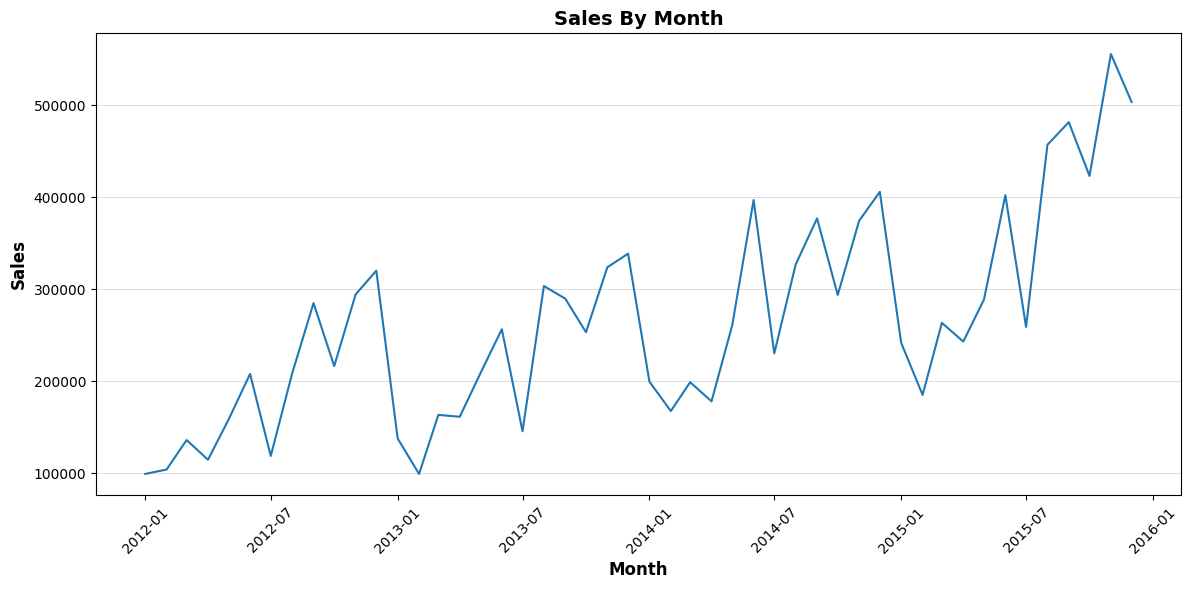

In [ ]:
# @title

# Group Sales Data by Year and Month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)  # Convert Period to String

# Remove data for the year 1998
filtered_data = monthly_sales[~monthly_sales['Order Date'].str.startswith('1998')].copy()

# Convert to datetime for plotting
filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])

# Plot the line chart
plt.figure(figsize=(14, 6))
plt.plot(filtered_data['Order Date'], filtered_data['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Month', fontsize=14, fontweight ='bold')
plt.xlabel('Month', fontsize=12, fontweight ='bold')
plt.ylabel('Sales', fontsize=12, fontweight ='bold')
plt.xticks(rotation=45)  # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

Looking at sales by month, sales between 2012 and 2014 saw steady increases with a significant jump in numbers by 2015. July appears to be a slump month for the store as it sees consistant declines in sales every year.

### Sales By Quarter:

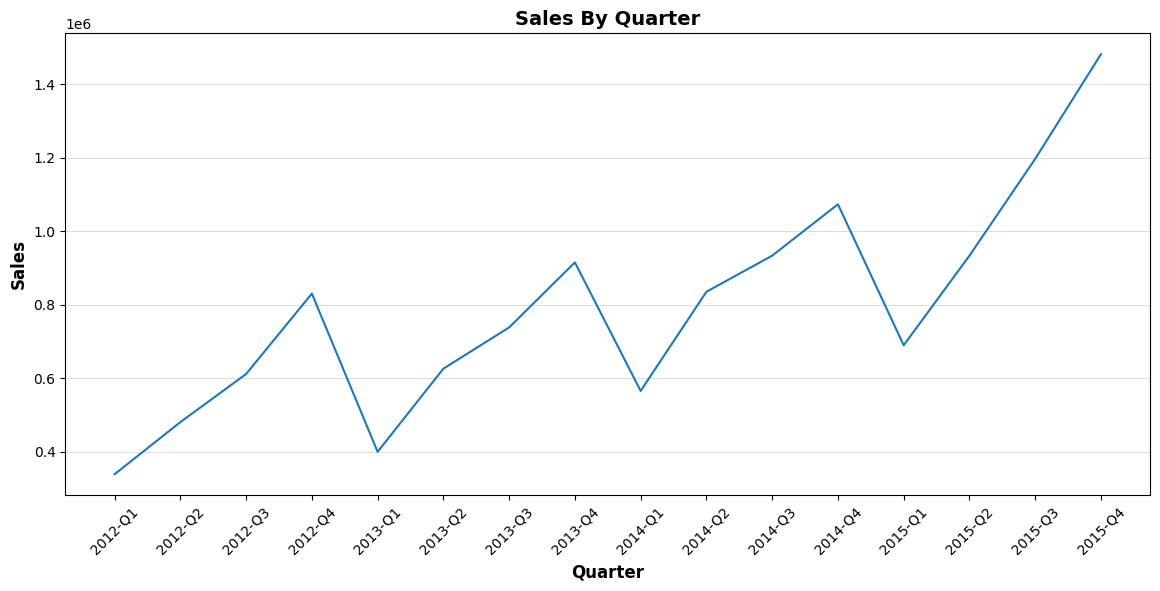

In [ ]:
# @title
# Group Sales Data by Quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()

# Convert 'Order Date' to string format YYYY-QX
quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str).str.replace("Q", "-Q")

# Extract Year and filter out 1998
quarterly_sales['Year'] = quarterly_sales['Order Date'].str.extract(r'(^\d{4})')[0].astype(int)
quarterly_sales = quarterly_sales[quarterly_sales['Year'] != 1998].copy()

# Plot the line chart
plt.figure(figsize=(14, 6))
plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Quarter', fontsize=14, fontweight ='bold')
plt.xlabel('Quarter', fontsize=12, fontweight ='bold')
plt.ylabel('Sales', fontsize=12, fontweight ='bold')
plt.xticks(rotation=45)  # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

Sales by quarter also displays growth in sales with a drastic increase in 2015. The growth while consistant has a decline every 1st quarter between 2012 and 2015.

### Monthly Sales Trends Separated by Year:

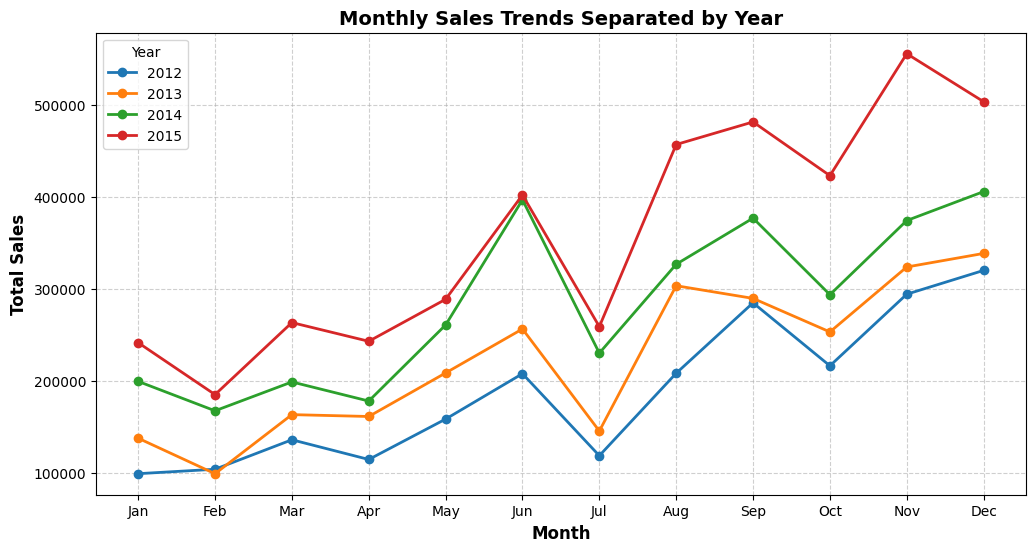

In [ ]:
# @title

# Assign dataframe df to orders_df
orders_df = df

# Create Year and Month columns for analysis
orders_df["Year"] = orders_df["Order Date"].dt.year
orders_df["Month"] = orders_df["Order Date"].dt.month

# Group by year and month to get monthly sales for each year
sales_by_year_month = orders_df.groupby(["Year", "Month"])['Sales'].sum().unstack(level=0)

# Filters out data related to the year 1998
filtered_data = sales_by_year_month.drop(columns=1998, errors='ignore')


# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot sales trends for each year
for year in filtered_data.columns:
    ax.plot(filtered_data.index, filtered_data[year], marker="o", linestyle="-", linewidth=2, label=str(year))

# Labels and title
ax.set_xlabel("Month", fontsize=12, fontweight ='bold')
ax.set_ylabel("Total Sales", fontsize=12, fontweight ='bold')
ax.set_title("Monthly Sales Trends Separated by Year", fontsize=14, fontweight='bold')

# X-axis ticks (Month names)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Add grid and legend
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(title="Year")

# Show the plot
plt.show()


Looking at monthly sales trends, the months of March, June, August, September and November appear to have the highests amount of sales each year. Drops in sales occur in February, April, July, and October. July and October in particular see the sharpest declines. There was a steady increase in sales from 2012 to 2014; however, the number of sales drastically increased in 2015.

### Yearly Profit from 2012 to 2015:

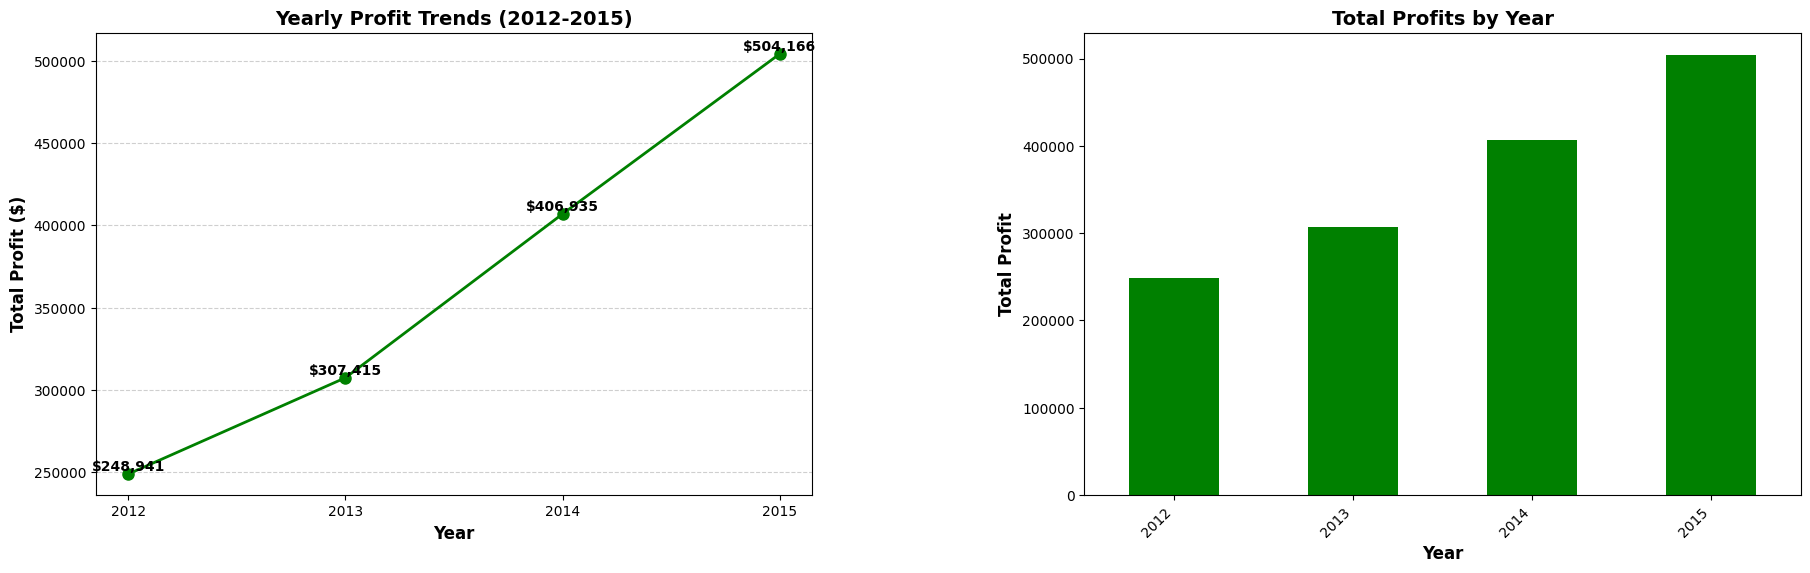

In [ ]:
# @title
import matplotlib.gridspec as gridspec

# Create figure with GridSpec to manually control spacing
fig = plt.figure(figsize=(22, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 0.2, 2])  # Adding space in the middle

# --- Line Chart: Yearly Profit Trends ---
ax1 = plt.subplot(gs[0])
ax1.plot(yearly_profit_summary["Order Year"], yearly_profit_summary["Profit"],
         marker='o', linestyle='-', color='green', linewidth=2, markersize=8)

# Annotate points with profit values
for year, profit in zip(yearly_profit_summary["Order Year"], yearly_profit_summary["Profit"]):
    ax1.text(year, profit, f"${profit:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax1.set_xlabel("Year", fontsize=12, fontweight='bold')
ax1.set_ylabel("Total Profit ($)", fontsize=12, fontweight='bold')
ax1.set_title("Yearly Profit Trends (2012-2015)", fontsize=14, fontweight='bold')
ax1.grid(axis="y", linestyle="--", alpha=0.6)
ax1.set_xticks(yearly_profit_summary["Order Year"])

# Empty space in the middle
plt.subplot(gs[1]).axis("off")

# --- Bar Chart: Total Profits by Year ---
ax2 = plt.subplot(gs[2])
filtered_data.plot(kind="bar", color="g", ax=ax2)

# Labels and title
ax2.set_xlabel("Year", fontsize=12, fontweight='bold')
ax2.set_ylabel("Total Profit", fontsize=12, fontweight='bold')
ax2.set_title("Total Profits by Year", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
ax2.set_xticklabels(filtered_data.index, rotation=45, ha="right")

# Show the plots with whitespace in between
plt.show()




Profits saw steady growth from year by year from 248,941 in 2012 to 504,166 in 2015.

### Sales Distribution by Region:

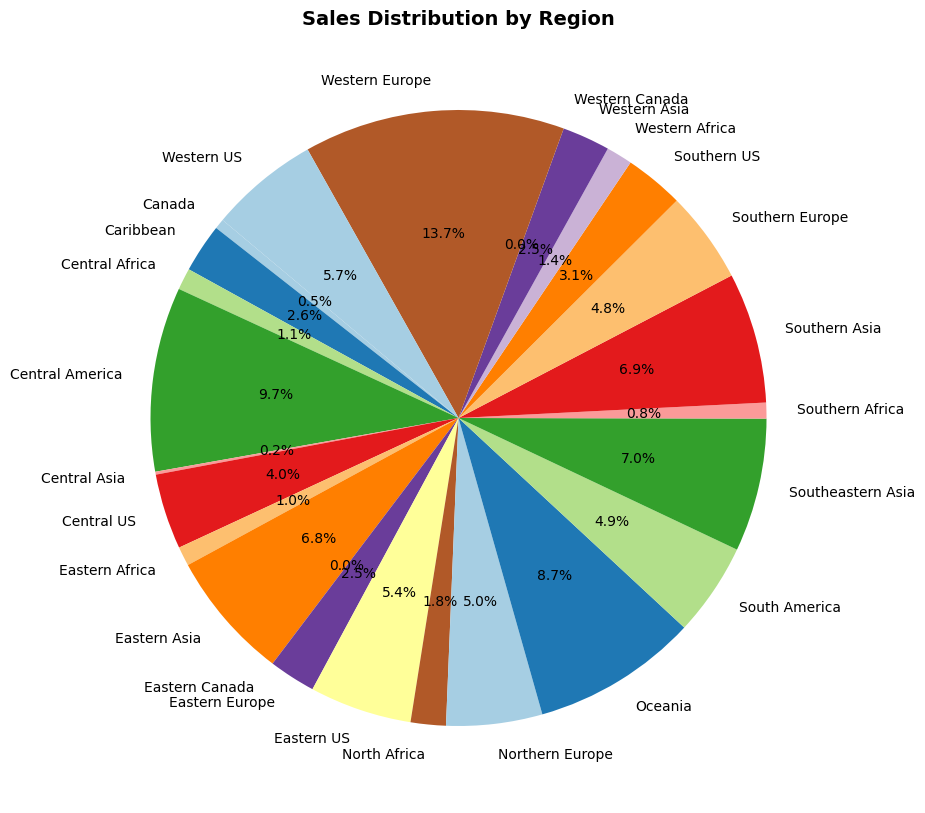

In [ ]:
# @title
# Assign dataframe df to orders_df
orders_df = df

# Create pie chart for sales based on region
region_sales = orders_df.groupby("Region")["Sales"].sum()
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax.set_title("Sales Distribution by Region", fontsize=14, fontweight='bold')

# Show pie chart
plt.show()

With sales distribution by region, Western Europe appears to have the largest distribution at 13.7%. Next is Central America at 9.7%, Oceania at 8.7%, and Southeastern Asia at 7%.

### Relationship of Sales and Profits:

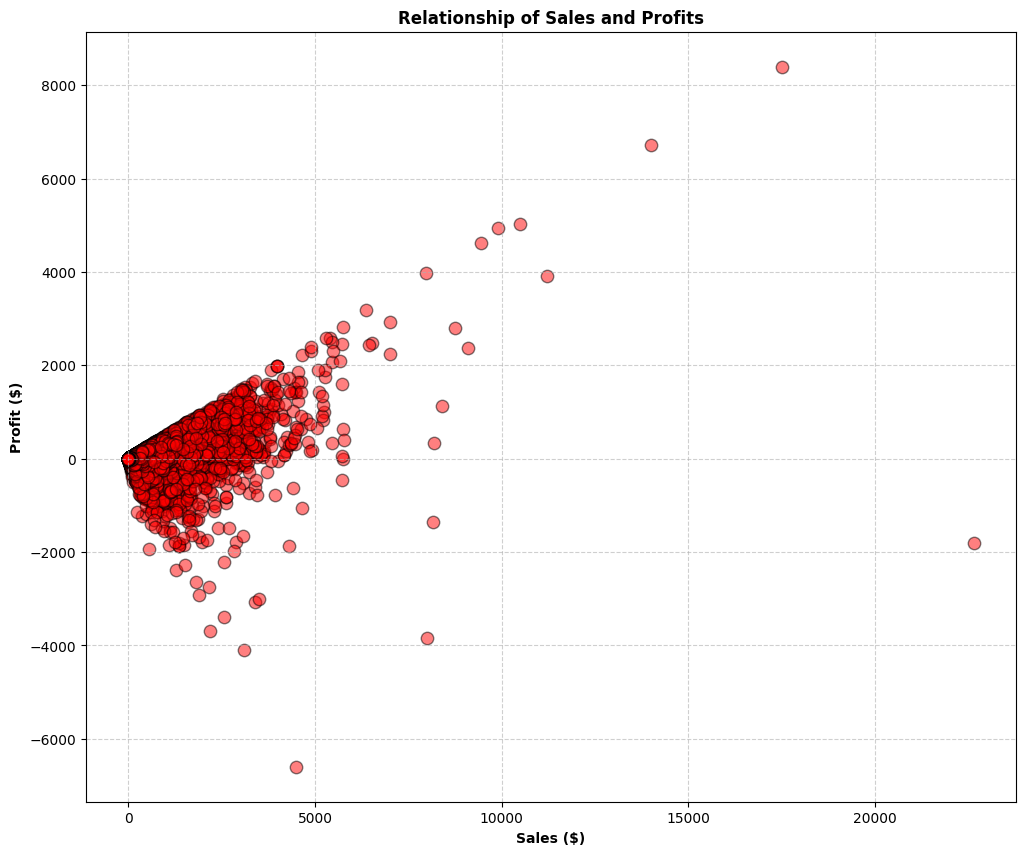

In [ ]:
# @title
#Scatter Plot Graph of Sales and Profits

df_orders = df

# Create scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(df_orders["Sales"], df_orders["Profit"], s=80, alpha=0.5, color='red', edgecolors='k')

# Labels and title
plt.xlabel("Sales ($)", fontweight ='bold')
plt.ylabel("Profit ($)", fontweight ='bold')
plt.title("Relationship of Sales and Profits", fontweight ='bold')
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

Looking at a scatter plot of sales and profits, there's a positive correlation between the two variables; however, there are a number of outliers displaying high sales with profit losses. The cluster is densest closer to 0 suggesting most of the transactions involve smaller sale values.   

### Top 10 Most Profitable Products:

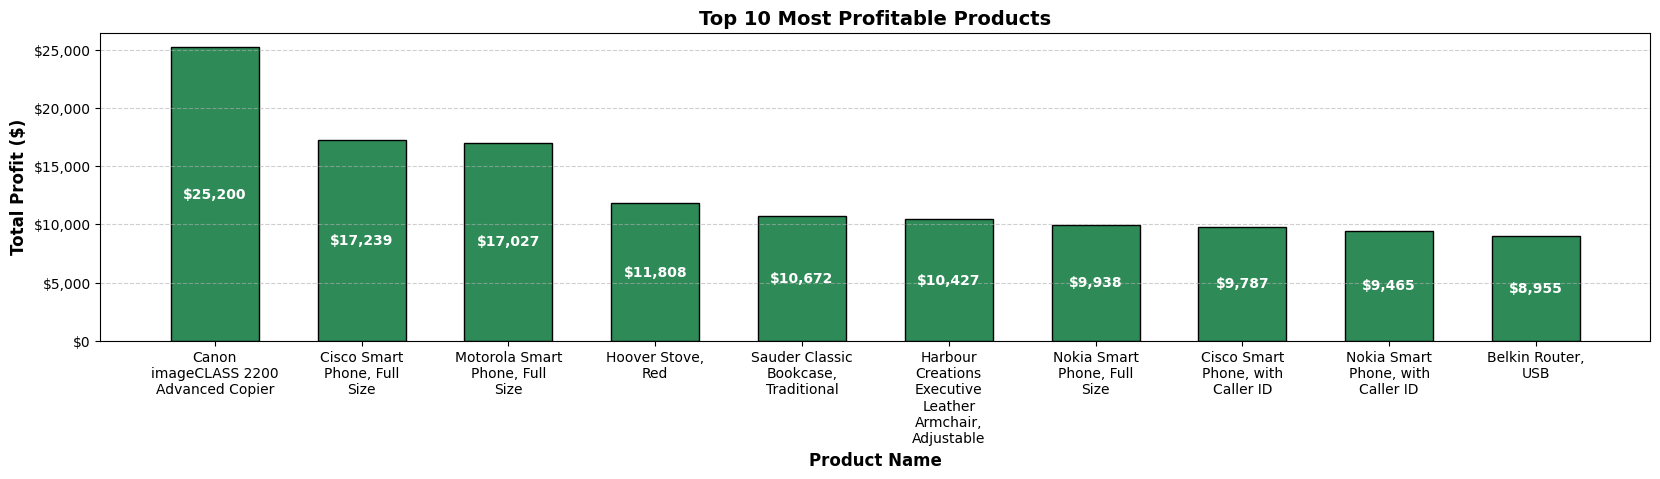

In [ ]:
# @title

# Group by Product Name and calculate total sales and total profit
product_profit_summary = df.groupby("Product Name").agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# Filter for products with consistently high profits (top 10 by total profit)
top_10_profitable_products = product_profit_summary.nlargest(10, "Profit").sort_values(by="Profit", ascending=False)

# Wrap long product names
wrapped_labels = [textwrap.fill(name, width=15) for name in top_10_profitable_products["Product Name"]]

# Create figure and bar chart
plt.figure(figsize=(20, 4))
bars = plt.bar(top_10_profitable_products["Product Name"], top_10_profitable_products["Profit"],
               color="seagreen", edgecolor="black", width=0.6)

# Annotate bars with total profit values
for bar, profit in zip(bars, top_10_profitable_products["Profit"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5,
             f"${profit:,.0f}", ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Formatting
plt.xlabel("Product Name", fontsize=12, fontweight ='bold')
plt.ylabel("Total Profit ($)", fontsize=12, fontweight ='bold')
plt.title("Top 10 Most Profitable Products", fontsize=14, fontweight ='bold')
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)  # Adjust X-axis labels
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))  # Format Y-axis
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

A review of the 10 most profitable products show that Canon imageCLASS 2200 was the most profitable product the store sold with 25,200 in total profits followed by two smart phones from Cisco and Motorola at 17,239 and 17,027 respectfully. A major appliance Hoover Stoves had 11,808 in profits and bookcase from Sauder and a leather armchair Harbour Creations are next with 10,672 and 10,427. A series of three smart phones from Nokia and Cisco made over 9,000 in profits. Finally, Belkin Routers saw $8,955.

### Top 10 Products Losing Profits Due to Discounts:

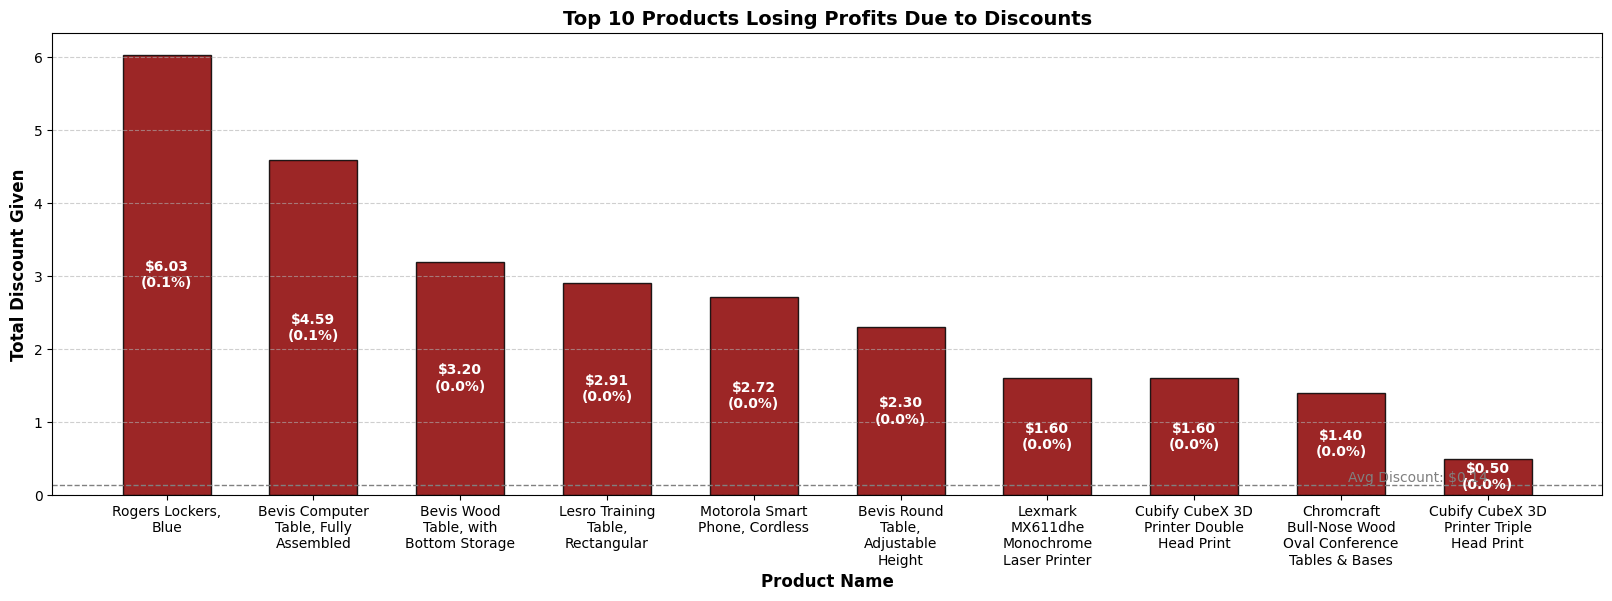

In [ ]:
# @title
# Group by Product Name and calculate total discount and total profit
product_discount_summary = df.groupby("Product Name").agg({"Discount": "sum", "Profit": "sum"}).reset_index()

# Filter for top 10 products with the most negative profit (biggest losses)
top_10_losing_products = product_discount_summary.nsmallest(10, "Profit")

# Sort products by highest total discount (descending)
top_10_losing_products = top_10_losing_products.sort_values(by="Discount", ascending=False)

# Calculate percentage of total discount safely
total_discount = df["Discount"].sum()
if total_discount != 0:
    top_10_losing_products["Discount %"] = (top_10_losing_products["Discount"] / total_discount) * 100
else:
    top_10_losing_products["Discount %"] = 0

# Wrap long product names for readability
wrapped_labels = [textwrap.fill(name, width=15) for name in top_10_losing_products["Product Name"]]

# Create figure and bar chart
plt.figure(figsize=(20, 6))
bars = plt.bar(wrapped_labels, top_10_losing_products["Discount"],
               color="darkred", edgecolor="black", alpha=0.85, width=0.6)

# Annotate bars with total discount values and percentage
for bar, discount, percentage in zip(bars, top_10_losing_products["Discount"], top_10_losing_products["Discount %"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5,
             f"${discount:.2f}\n({percentage:.1f}%)",
             ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add reference line for average discount safely
avg_discount = df["Discount"].mean() if not df["Discount"].isna().all() else 0
plt.axhline(avg_discount, color='grey', linestyle='dashed', linewidth=1)
plt.text(len(top_10_losing_products)-1, avg_discount, f"Avg Discount: ${avg_discount:.2f}",
         ha="right", va="bottom", fontsize=10, color="grey")

# Formatting
plt.xlabel("Product Name", fontsize=12, fontweight ='bold')
plt.ylabel("Total Discount Given", fontsize=12, fontweight ='bold')
plt.title("Top 10 Products Losing Profits Due to Discounts", fontsize=14, fontweight ='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

A number of products saw losses in profits due to discounts with the largest being Rogers Lockers followed by a number of Bevis, Chromcraft, and Lesro products suggesting discounts applied to these products should be explored to determine if profit margins can be improved.  

### Top 15 Most Ordered Items:

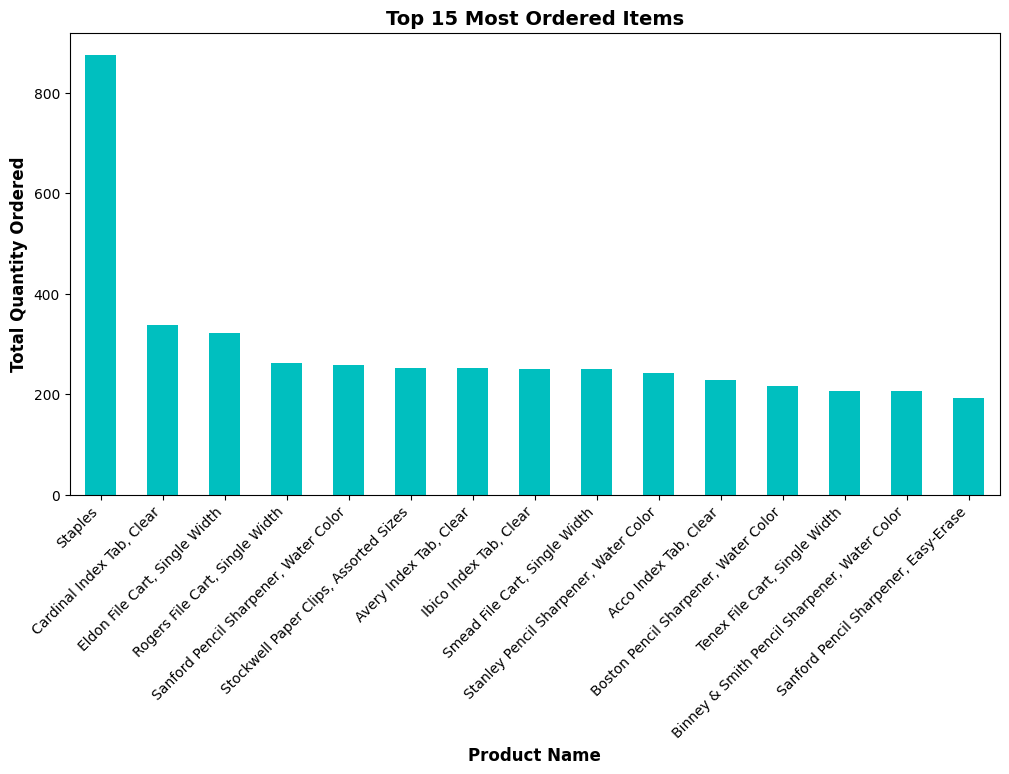

In [ ]:
# @title
# Assign dataframe df to orders_df
orders_df = df

# Group by 'Product Name' to get total quantity ordered
product_order_counts = orders_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False)

# Select top 15 most ordered items for better visualization
top_n = 15
top_products = product_order_counts.head(top_n)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
top_products.plot(kind="bar", color="c", ax=ax)

# Labels and title
ax.set_xlabel("Product Name", fontsize=12, fontweight ='bold')
ax.set_ylabel("Total Quantity Ordered", fontsize=12, fontweight ='bold')
ax.set_title(f"Top {top_n} Most Ordered Items", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

According to this chart, the store's most ordered product are staples by a wide margin followed by index tabs and file carts. Outside of this, there wasn't much in terms of variation between the remaining products.

### Sales by Category:

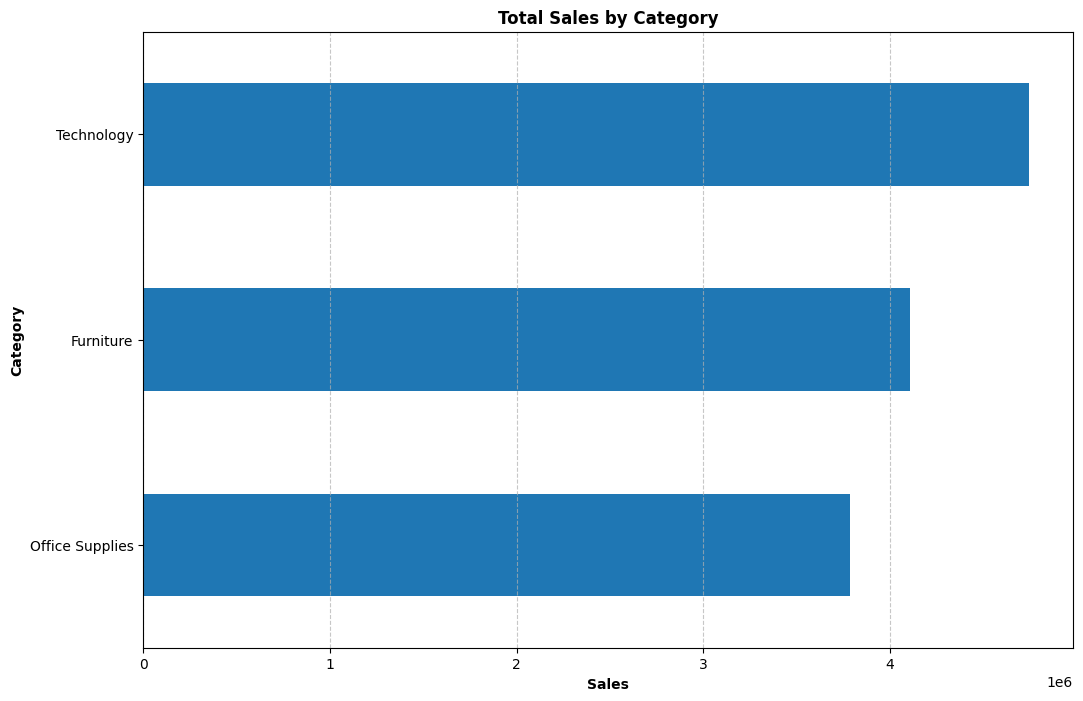

In [ ]:
# @title
# Group sales data by Category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Remove any categories containing 'na'
sales_by_category = sales_by_category[sales_by_category.index != 'na']

# Sort values for better visualization
sales_by_category = sales_by_category.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sales_by_category.plot(kind='barh')

# Labels and title
plt.xlabel("Sales", fontsize=10, fontweight='bold')
plt.ylabel("Category", fontsize=10, fontweight='bold')
plt.title("Total Sales by Category", fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Products are split between three main categories: technology, furniture, and office supplies. Technology appears to have the most sales followed by furniture, and office supplies.

### Sales by Sub-Category:

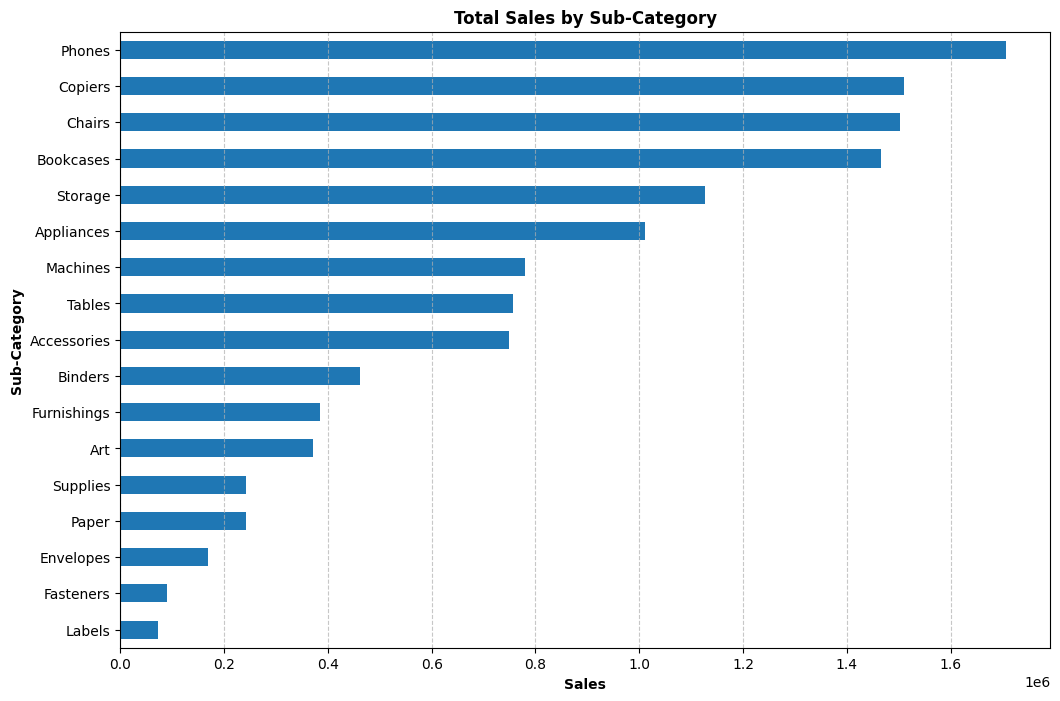

In [ ]:
# @title
# Group sales data by Sub-Category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()

# Remove any sub-categories containing 'na'
sales_by_subcategory = sales_by_subcategory[sales_by_subcategory.index != 'na']

# Sort values for better visualization
sales_by_subcategory = sales_by_subcategory.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sales_by_subcategory.plot(kind='barh')

# Labels and title
plt.xlabel("Sales", fontsize=10, fontweight='bold')
plt.ylabel("Sub-Category", fontsize=10, fontweight='bold')
plt.title("Total Sales by Sub-Category", fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Looking at a breakdown of product sub-categories, phones, copiers, chairs, and bookcase appear to see significant portion of sales overall. Next are storage products such as lockers, and appliances such as ovens. Sales saw a steep drop with other products.   

### Sales Distribution by Category:

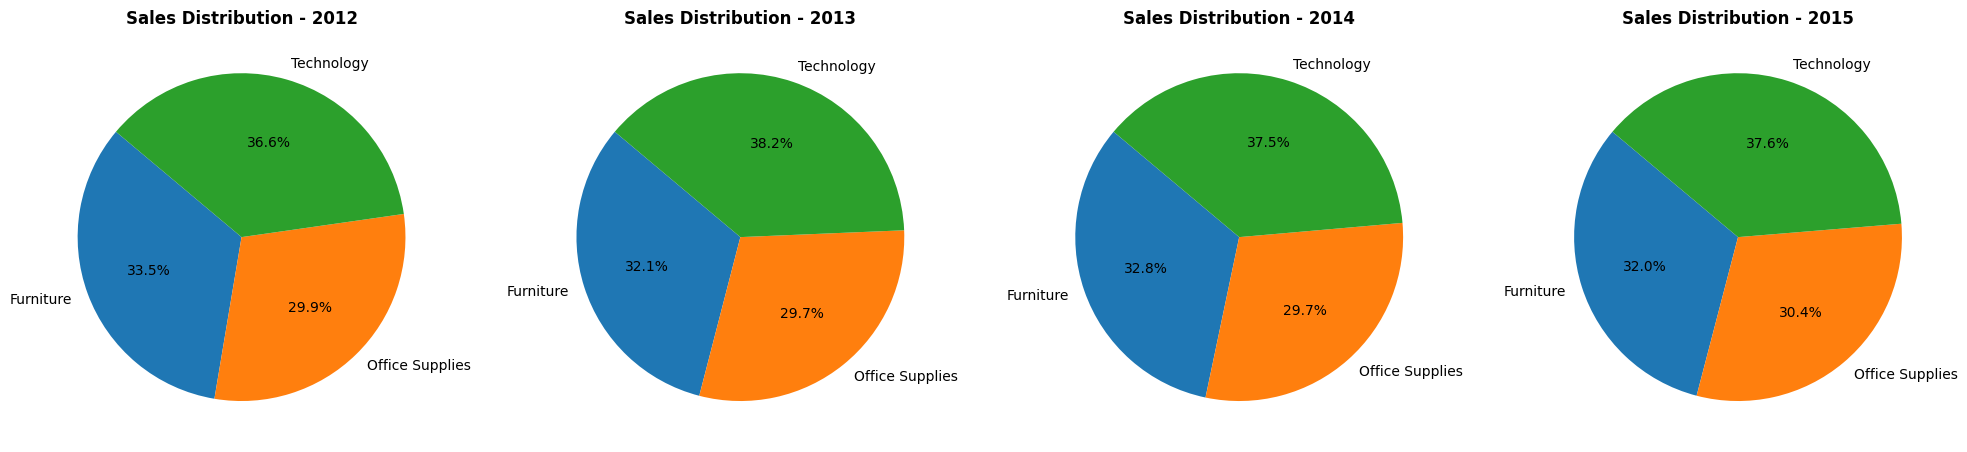

In [ ]:
# @title
# Ensure data integrity by removing NaN and zero sales values
df_orders_cleaned = df_orders.dropna(subset=['Category', 'Sales'])
df_orders_cleaned = df_orders_cleaned[df_orders_cleaned['Sales'] > 0]  # Remove zero sales

# Group sales data by Year and Category
sales_by_category_year = df_orders_cleaned.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Get unique years for iteration
years = sales_by_category_year['Year'].unique()

# Create subplots with multiple charts in one figure
fig, axes = plt.subplots(1, len(years), figsize=(20, 6))

# Check if there's at least one valid year before plotting
if len(years) > 0:
    # Ensure axes is an array (in case there's only one year)
    if len(years) == 1:
        axes = [axes]

    # Generate pie charts for each year
    for ax, year in zip(axes, years):
        data = sales_by_category_year[sales_by_category_year['Year'] == year]
        labels = data['Category']
        sizes = data['Sales']

        if not sizes.empty:  # Ensure there is data to plot
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            ax.set_title(f'Sales Distribution - {year}', fontweight='bold')
        else:
            ax.set_title(f'No Sales Data - {year}')
            ax.axis("off")  # Hide empty charts

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()
else:
    print("No valid sales data available for visualization.")

A closer look at sales distribution by category shows technology as the largest portion of sales at over 35% between 2012 and 2015. Furniture was over 31% and office supplies at 30%.

### Profit Distribution by Category:

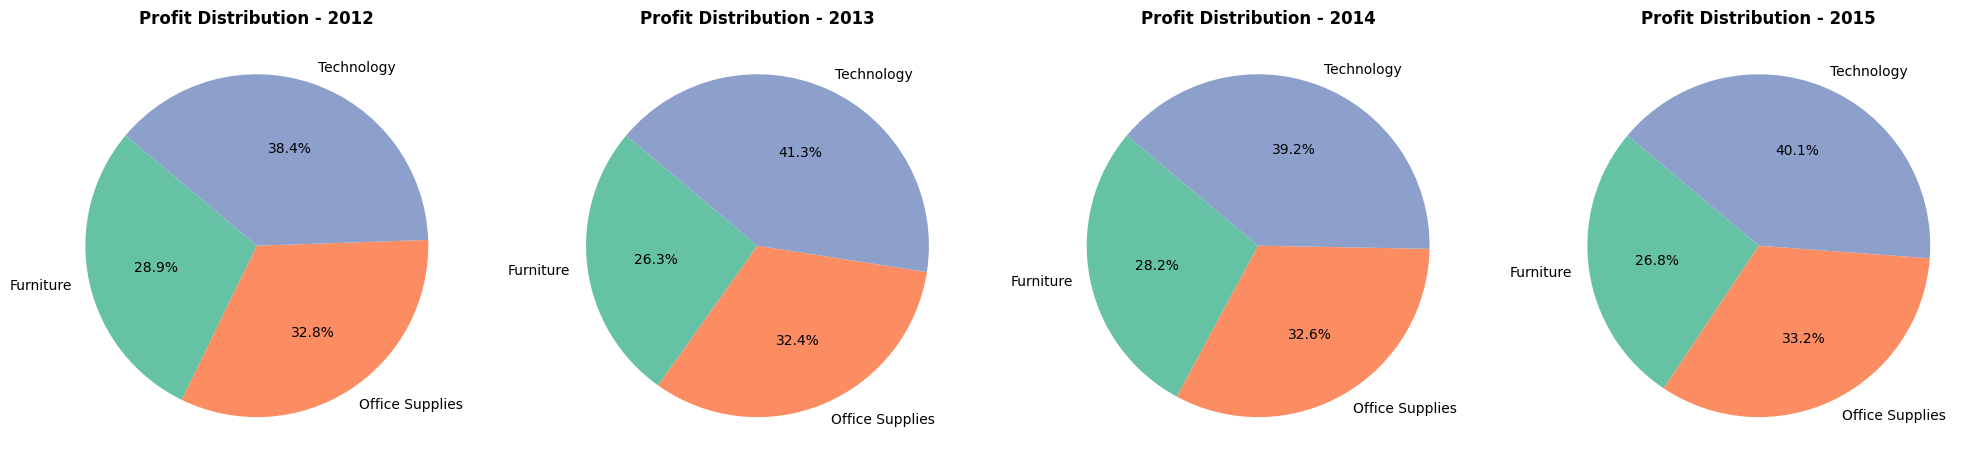

In [ ]:
# @title
# Ensure data integrity by removing NaN and zero sales values
df_orders_cleaned = df.dropna(subset=['Category', 'Profit'])
df_orders_cleaned = df_orders_cleaned[df_orders_cleaned['Profit'] > 0]  # Remove zero sales

# Group sales data by Year and Category
sales_by_category_year = df_orders_cleaned.groupby(['Year', 'Category'])['Profit'].sum().reset_index()

# Get unique years for iteration
years = sales_by_category_year['Year'].unique()

new_colors = plt.get_cmap("Set2").colors  # Switching to a new predefined colormap

# Create subplots with multiple charts in one figure
fig, axes = plt.subplots(1, len(years), figsize=(20, 6))

# Check if there's at least one valid year before plotting
if len(years) > 0:
    # Ensure axes is an array (in case there's only one year)
    if len(years) == 1:
        axes = [axes]



    # Generate pie charts for each year
    for ax, year in zip(axes, years):
        data = sales_by_category_year[sales_by_category_year['Year'] == year]
        labels = data['Category']
        sizes = data['Profit']

        if not sizes.empty:  # Ensure there is data to plot
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=new_colors)
            ax.set_title(f'Profit Distribution - {year}', fontweight='bold')

        else:
            ax.set_title(f'No Profit Data - {year}')
            ax.axis("off")  # Hide empty charts

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()
else:
    print("No valid profit data available for visualization.")

With regards to profits, Technology consisted around 38% to 40%, office supplies at 32% and furniture between 26% and 28% from 2012 to 2015.

## Summary:

The store has seen steady performance in both sales and profits between 2012 and 2014. 2015 was superstore's most profitable year with a signficant increase in sales and profits (504,166).

Superstore saw 1.7 million in sales of phones, 1.5 million in sales of chairs, 1.4 million in bookcases, 1.1 million in storage and 1 million in appliances over the course of 4 years.

In terms of sales, results show technology based products sold the most at 4.7 million, then furniture at 4.1 miilion, and office supplies 3.7 million.

The store has some issues with how it applies discounts leading to profit losses which may need to be reviewed.

Based on the data, the store sees a steady trend of increased sales at the end of the year followed by sharp declines in July.